# Stage 1 - Exploratory Data analysis

#Problem statement
'Saap,’ a smartphone retailer, seeks to analyze historical sales data of previously launched smartphones to identify key trends, patterns, and factors influencing their performance in the market. The objective of this study is to perform detailed statistical analysis on the existing dataset to uncover sales dynamics, seasonal trends, and customer behavior patterns. By leveraging data visualization techniques and effective data storytelling, we aim to translate raw data into meaningful business insights. These findings will enable the retailer to refine its pricing,marketing, and product positioning strategies, ensuring better alignment with market demand and enhancing overall business performance



**Objective:** Analyze historical smartphone data to identify sales dynamics, seasonal trends, and customer behavior patterns. Translate raw data into business insights using statistical tests and visualizations.





In [1]:
#Import Needed libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#import dataset
from google.colab import files
uploaded = files.upload()


Saving cellphone_data.csv to cellphone_data.csv


In [4]:
# Load the dataset
# Print the total number of rows and columns
# Display the first 6 rows to preview the structure and sample data
df = pd.read_csv('cellphone_data.csv')
print('Rows:', len(df), '| Columns:', df.shape[1])
df.head(3)

Rows: 990 | Columns: 22


,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,...,screen size,weight,price(INR),release date,user_name,Region(City),Salary_in_INR,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,...,6.5,204,13888.65,14/01/2021,Ram,Delhi,570500,38,Female,Data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,...,6.1,194,20614.60,26/10/2018,Ram,Delhi,570500,38,Female,Data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,...,6.1,167,46120.80,25/02/2022,Ram,Delhi,570500,38,Female,Data analyst


**Perform Other Data Pre-processing steps below such as checking data description, null values etc.**

In [7]:



def preprocess_and_report(df: pd.DataFrame) -> pd.DataFrame:
    print("\n=== STEP 0: SHAPE & COLUMN TYPES ===")
    print(f"Rows: {len(df)}, Columns: {df.shape[1]}")
    print(df.dtypes)

    # STEP 1: Missing values overview
    print("\n=== STEP 1: MISSING VALUES (count per column) ===")
    print(df.isna().sum())

    # STEP 2: Duplicates
    dup_count = df.duplicated().sum()
    print("\n=== STEP 2: DUPLICATES ===")
    print(f"Duplicate rows found: {dup_count}")
    # Uncomment next line to drop duplicates:
    # df = df.drop_duplicates()

    # STEP 3: Strip text columns
    obj_cols = df.select_dtypes(include="object").columns.tolist()
    print("\n=== STEP 3: TEXT CLEANING (strip) ===")
    print(f"Text columns: {obj_cols}")
    if obj_cols:
        df[obj_cols] = df[obj_cols].apply(lambda s: s.str.strip())
        print("Applied .str.strip() to text columns.")

    # STEP 4: Date conversion + year/month
    print("\n=== STEP 4: DATE CONVERSION ===")
    if "release date" in df.columns:
        before_non_null = df["release date"].notna().sum()
        df["release date"] = pd.to_datetime(df["release date"], errors="coerce")
        after_non_null = df["release date"].notna().sum()
        print(f"'release date' parsed. Non-null before: {before_non_null}, after: {after_non_null}")
        df["release_year"] = df["release date"].dt.year
        df["release_month"] = df["release date"].dt.month
        print("Created 'release_year' and 'release_month'.")
    else:
        print("Column 'release date' not present—skipping.")

    # STEP 5: Coerce specific numeric columns (if they exist)
    print("\n=== STEP 5: NUMERIC COERCION ===")
    to_numeric = [
        'rating','internal memory','RAM','performance','main camera','selfie camera',
        'battery size','screen size','weight','price(INR)','Salary_in_INR','age'
    ]
    coerced = []
    for c in to_numeric:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
            coerced.append(c)
    print(f"Coerced to numeric: {coerced if coerced else 'None'}")

    # STEP 6: Fill missing values
    print("\n=== STEP 6: FILL MISSING VALUES ===")
    obj_cols = df.select_dtypes(include="object").columns
    num_cols = df.select_dtypes(include="number").columns

    filled_obj, filled_num = [], []
    for col in obj_cols:
        if df[col].isna().any():
            mode_vals = df[col].mode()
            if not mode_vals.empty:
                df[col].fillna(mode_vals.iloc[0], inplace=True)
                filled_obj.append(col)
    for col in num_cols:
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)
            filled_num.append(col)

    print(f"Filled (categorical by mode): {filled_obj if filled_obj else 'None'}")
    print(f"Filled (numeric by median): {filled_num if filled_num else 'None'}")

    # Final snapshot
    print("\n=== STEP 7: FINAL SUMMARY ===")
    print("Remaining missing values:")
    print(df.isna().sum())
    print("\nSample of cleaned data:")
    print(df.head(10))  # show first 10 rows

    return df


# --------------------------
# DEMO (replace df_demo with your actual df)
# --------------------------
df_demo = pd.DataFrame({
    'brand': [' Google ', 'Apple', None, 'Samsung ', ' OnePlus'],
    'model': [' Pixel 9a ', ' iPhone 16 ', 'Nord 4', None, ' Pixel 8a'],
    'release date': ['2025-04-10', '2024-09-20', 'invalid', None, '2024-05-14'],
    'rating': ['4.5', '4.7', None, '4.1', 'bad'],
    'price(INR)': ['49999', '79999', '32999', None, '39999'],
    'age': [25, None, 31, 29, '27'],
    'user_name': ['  vivek ', 'isha', 'harshal', None, ' dhawan ']
})

print("\n######## RUNNING PREPROCESSING ON DEMO DF ########")
df_clean = preprocess_and_report(df_demo)
# If you want to view the cleaned DataFrame outside Jupyter:
# print("\n=== CLEANED DF ===\n", df_clean.to_string(index=False))



######## RUNNING PREPROCESSING ON DEMO DF ########

=== STEP 0: SHAPE & COLUMN TYPES ===
Rows: 5, Columns: 7
brand           object
model           object
release date    object
rating          object
price(INR)      object
age             object
user_name       object
dtype: object

=== STEP 1: MISSING VALUES (count per column) ===
brand           1
model           1
release date    1
rating          1
price(INR)      1
age             1
user_name       1
dtype: int64

=== STEP 2: DUPLICATES ===
Duplicate rows found: 0

=== STEP 3: TEXT CLEANING (strip) ===
Text columns: ['brand', 'model', 'release date', 'rating', 'price(INR)', 'age', 'user_name']
Applied .str.strip() to text columns.

=== STEP 4: DATE CONVERSION ===
'release date' parsed. Non-null before: 4, after: 3
Created 'release_year' and 'release_month'.

=== STEP 5: NUMERIC COERCION ===
Coerced to numeric: ['rating', 'price(INR)', 'age']

=== STEP 6: FILL MISSING VALUES ===
Filled (categorical by mode): ['brand', 'model', 'u

/tmp/ipython-input-2049668631.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_vals.iloc[0], inplace=True)
/tmp/ipython-input-2049668631.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

**Key Steps & Insights of Data Pre-processing**

1.Used df.info() and df.describe() to confirm column data types and spot anomalies.

2.Handled missing values

3.Identified nulls and imputed:

4.Numeric → median (robust to outliers)
Categorical → mode (most frequent value).
5.Remove duplicates

6.Cleaned text columns

7.Trimmed spaces in brand, model, operating system, Region(City), etc.
Prevents category duplication (e.g., “Android” vs “Android ”).


8.Converted release date to datetime and created release_year and release_month for seasonal analysis.



9.Flagged out-of-range values (e.g., RAM > 64 GB, battery size < 500 mAh).





# Split the variables in the dataset into numerical and categorical types.

In [ ]:

# Split variables into numerical and categorical types
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()


max_len = max(len(numeric_cols), len(categorical_cols))
numeric_cols += [''] * (max_len - len(numeric_cols))
categorical_cols += [''] * (max_len - len(categorical_cols))

summary_df = pd.DataFrame({
    'Numeric Columns': numeric_cols,
    'Categorical Columns': categorical_cols
})

# Display the table
print(summary_df.to_string(index=False))



Numeric Columns Categorical Columns
        user_id               brand
   cellphone_id               model
         rating    operating system
internal memory        release date
            RAM           user_name
    performance        Region(City)
    main camera              gender
  selfie camera          occupation
   battery size                    
    screen size                    
         weight                    
     price(INR)                    
  Salary_in_INR                    
            age                    
   release_year                    
  release_month                    


# Create boxplots for all numerical variables to check for outliers.

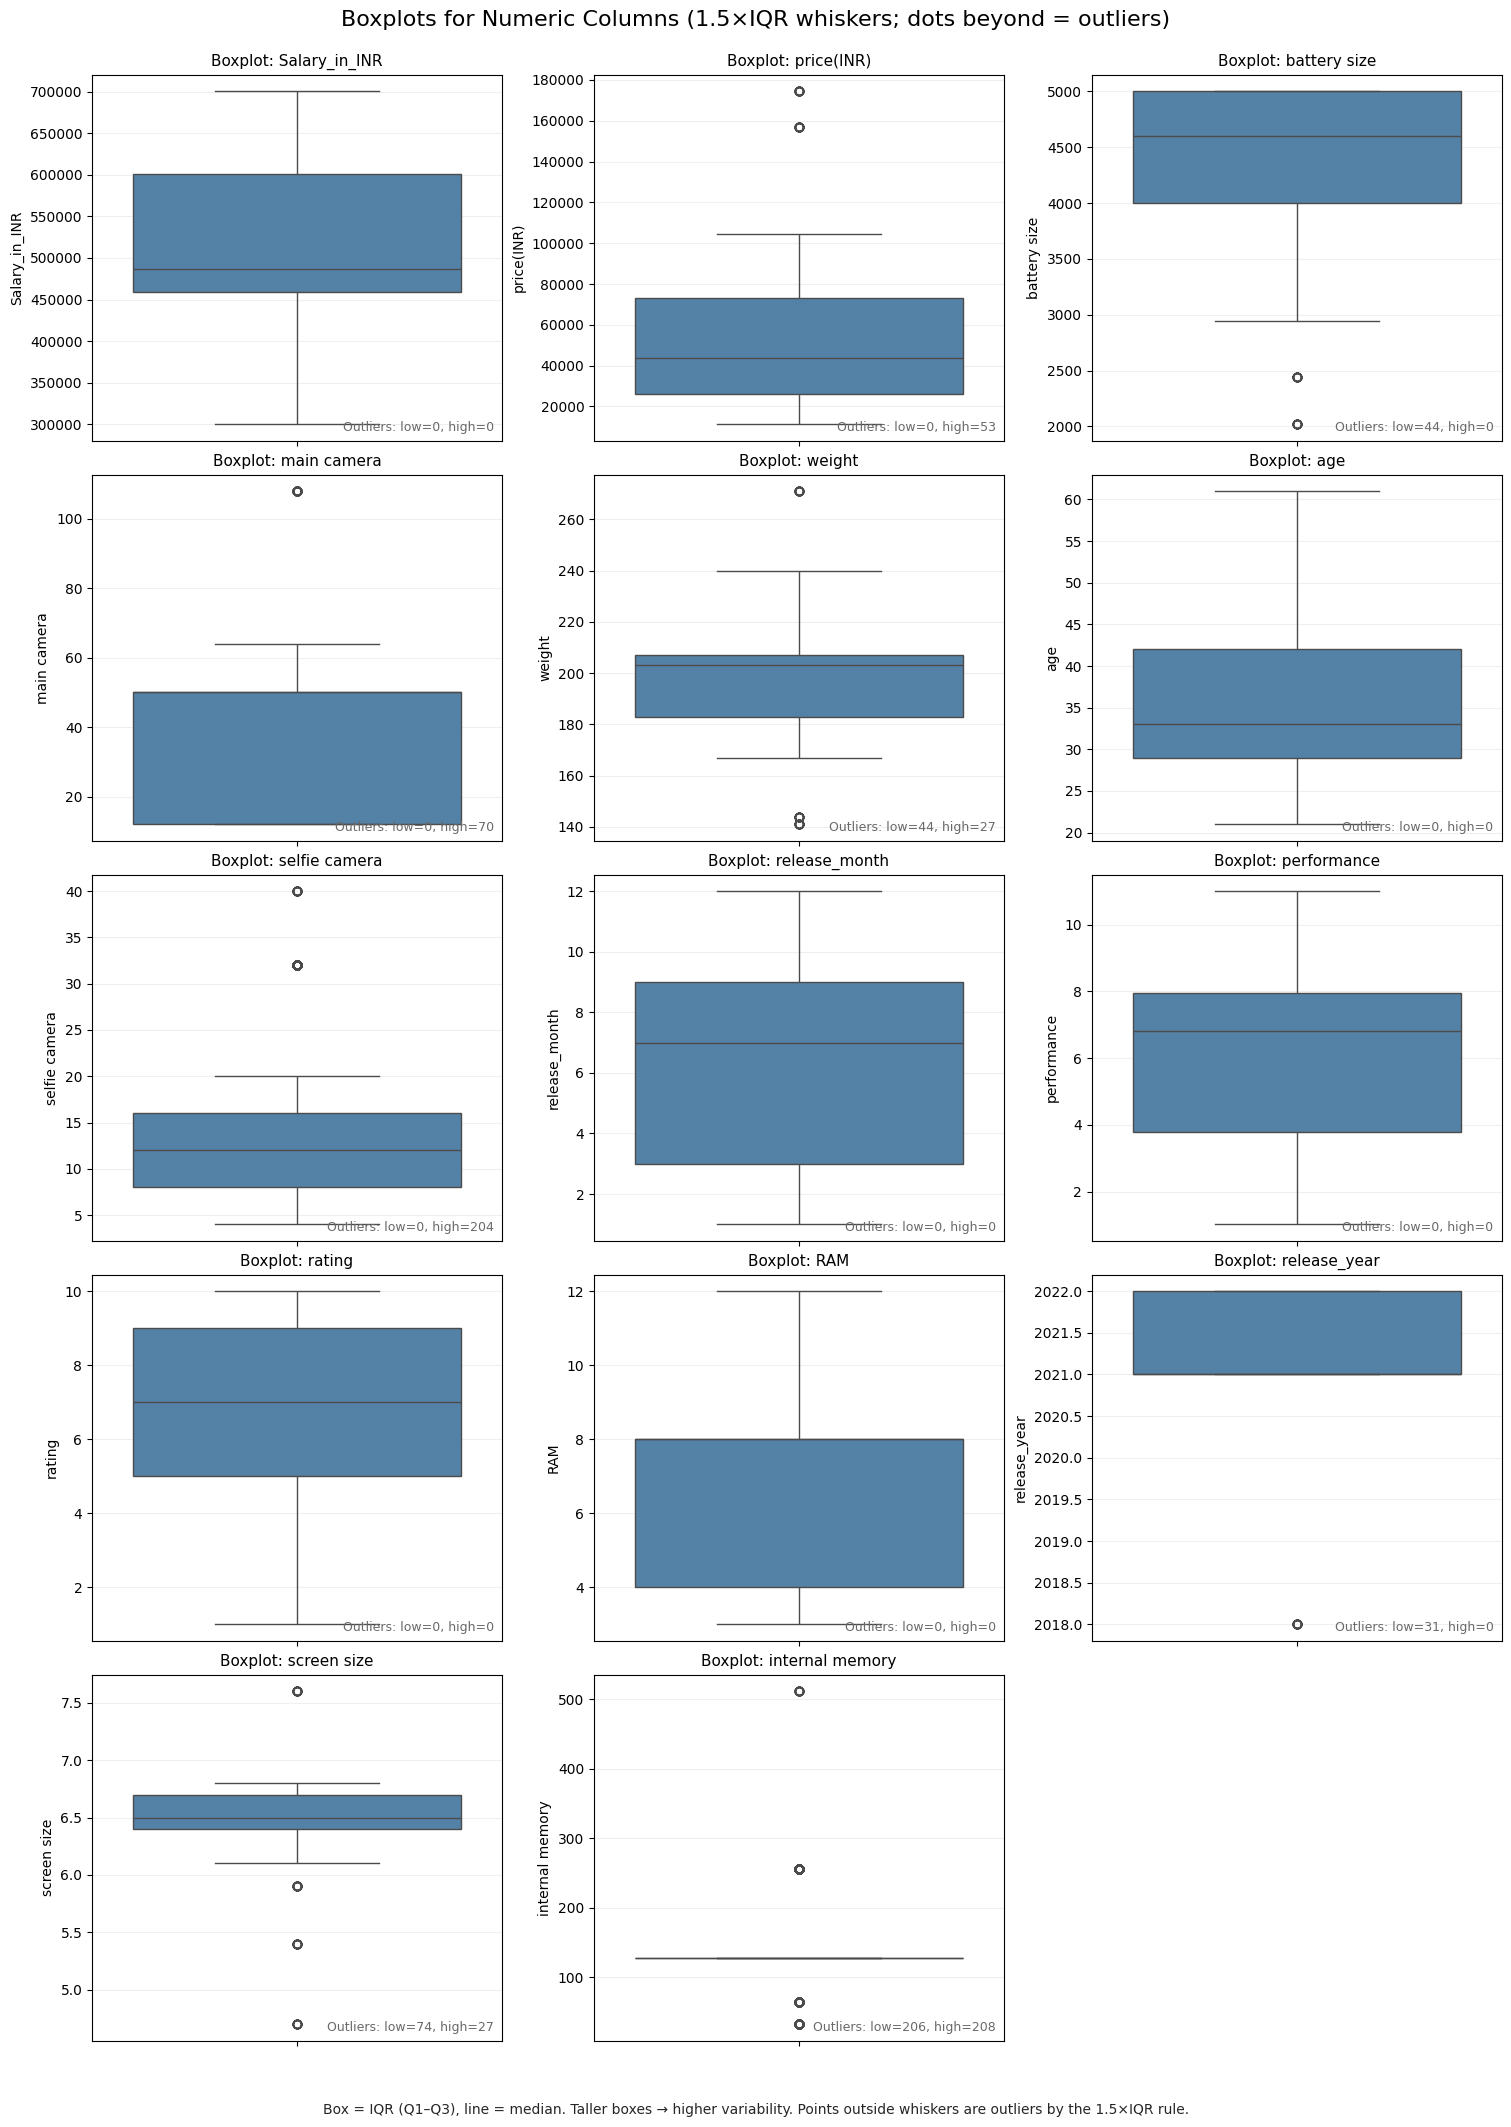

Saved: boxplots_cellphone_data.png
Saved: boxplot_summary_cellphone_data.csv
Numeric columns plotted: ['Salary_in_INR', 'price(INR)', 'battery size', 'main camera', 'weight', 'age', 'selfie camera', 'release_month', 'performance', 'rating', 'RAM', 'release_year', 'screen size', 'internal memory']


In [ ]:

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
id_like_cols = [c for c in ['user_id', 'cellphone_id'] if c in df.columns]
plot_cols = [c for c in numeric_cols if c not in id_like_cols]

if len(plot_cols) == 0:
    raise ValueError("No numeric columns found to plot after excluding identifier-like columns.")

# -----------------------
# 3) Order columns by IQR (descending) to surface variability first
# -----------------------
def calc_iqr(series: pd.Series) -> float:
    s = series.dropna()
    if s.empty:
        return 0.0
    q1 = np.percentile(s, 25)
    q3 = np.percentile(s, 75)
    return float(q3 - q1)

plot_cols = sorted(plot_cols, key=lambda c: calc_iqr(df[c]), reverse=True)

# -----------------------
# 4) Create grid of boxplots + annotate outliers
# -----------------------
n = len(plot_cols)
cols = 3                                  # number of plots per row
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)
axes = np.array(axes).reshape(-1)

for i, col in enumerate(plot_cols):
    ax = axes[i]
    sns.boxplot(y=df[col], ax=ax, color='steelblue')
    ax.set_title(f'Boxplot: {col}', fontsize=11)
    ax.set_xlabel("")                     # cleaner look
    ax.grid(True, axis='y', alpha=0.2)

    # Compute outlier counts (1.5 × IQR rule) and annotate
    s = df[col].dropna()
    if len(s) > 0:
        q1 = np.percentile(s, 25)
        q3 = np.percentile(s, 75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        out_low = int((s < lower).sum())
        out_high = int((s > upper).sum())

        # Annotation at bottom-right of each subplot
        ax.text(0.98, 0.02,
                f'Outliers: low={out_low}, high={out_high}',
                transform=ax.transAxes, ha='right', va='bottom',
                fontsize=9, color='dimgray')

# Remove extra empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global title & caption
fig.suptitle('Boxplots for Numeric Columns (1.5×IQR whiskers; dots beyond = outliers)', fontsize=16, y=1.02)
fig.text(0.5, -0.03,
         'Box = IQR (Q1–Q3), line = median. Taller boxes → higher variability. '
         'Points outside whiskers are outliers by the 1.5×IQR rule.',
         ha='center', va='center', fontsize=10, alpha=0.85)

# Save figure (also shows inline in Colab if you call plt.show())
plt.savefig('boxplots_cellphone_data.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------
# 5) Build numeric summary per column (CSV)
# -----------------------
summary_rows = []
for col in plot_cols:
    s = df[col].dropna()
    if len(s) == 0:
        summary_rows.append({
            'column': col, 'count': 0,
            'q1': np.nan, 'median': np.nan, 'q3': np.nan, 'iqr': np.nan,
            'lower_whisker_limit': np.nan, 'upper_whisker_limit': np.nan,
            'outliers_below': 0, 'outliers_above': 0
        })
        continue

    q1 = np.percentile(s, 25)
    q2 = np.percentile(s, 50)
    q3 = np.percentile(s, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    summary_rows.append({
        'column': col,
        'count': int(s.size),
        'q1': float(q1),
        'median': float(q2),
        'q3': float(q3),
        'iqr': float(iqr),
        'lower_whisker_limit': float(lower),
        'upper_whisker_limit': float(upper),
        'outliers_below': int((s < lower).sum()),
        'outliers_above': int((s > upper).sum())
    })

summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv('boxplot_summary_cellphone_data.csv', index=False)

print("Saved: boxplots_cellphone_data.png")
print("Saved: boxplot_summary_cellphone_data.csv")
print("Numeric columns plotted:", plot_cols)


# Key Insights :
1. **Rating** → Centered around median ≈ 7 with moderate spread (IQR ≈ 4) and no outliers; slightly left‑skewed (higher ratings are common).

2.**Internal memory** → Almost everyone is at 128 GB (IQR = 0), but there are many outliers below/above (32/64 GB and 256/512 GB), so this behaves more like categorical tiers than a continuous variable.

3.**RAM** → Median ≈ 8 GB, spread from 4–8 GB (IQR ≈ 4), no outliers, slight right‑skew (some 12 GB devices).

4.**Performance score** → Median ≈ 6.82, IQR ≈ 4.15, no outliers, mild left‑skew (more higher scores than very low ones). Overall, fairly consistent.

5.**Main camera (MP)** → Median ≈ 50 MP, wide spread (IQR ≈ 38), many high outliers (e.g., 64/108 MP), right‑skewed—flagships drive the upper tail.

6.**Selfie camera (MP)** → Median ≈ 12 MP, IQR ≈ 8, lots of high outliers and right‑skew—some models push 16 MP and beyond.

7.**Battery size (mAh)** → Median ≈ 4600 mAh, IQR ≈ 1000 mAh; a few low outliers (older/smaller devices), overall left‑skew because many devices cluster at 5000 mAh.

8.**Screen size (inches)** → Median ≈ 6.5″, tight IQR ≈ 0.3″; outliers on both sides (compact 4.7–5.4″ and large 7.6″), slight left‑skew given the cluster around 6.4–6.7″.

9.**Weight (grams)** → Median ≈ 203 g, IQR ≈ 24 g, mild right‑skew; light outliers (~141 g) and heavy outliers (~240 g) reflect compact vs. big‑battery/large‑screen phones.

10.**Price (INR)** → Median ≈ ₹43.7k, very wide IQR ≈ ₹47.3k, many high outliers (flagships at ₹86k–₹174k), strong right‑skew—premium devices drive the tail.

11.**Salary_in_INR (user)** → Median ≈ ₹4.86 L, IQR ≈ ₹1.42 L, no outliers under the 1.5×IQR rule, mild right‑skew (some higher earners).

12.**Age (user)** → Median ≈ 33 yrs, IQR ≈ 13 yrs, no outliers, right‑skew (more older users than very young).

In [ ]:
#1) Correlation of selected specs with price
cols = ['price(INR)','RAM','internal memory','main camera','selfie camera','battery size','performance']
corr_with_price = df[cols].corr()['price(INR)'].sort_values(ascending=False)
print("Correlation with price(INR):")
print(corr_with_price)


Correlation with price(INR):
price(INR)         1.000000
internal memory    0.825153
RAM                0.702622
performance        0.568055
selfie camera      0.060174
battery size      -0.178023
main camera       -0.237678
Name: price(INR), dtype: float64


**How to interpret:**

Values near +1 show strong positive association (e.g., performance, RAM).
Near 0 means weak/no linear relationship (often battery size).
Negative suggests inverse relation (rare here).

In [ ]:
# Compare price by OS (group means/medians)
df.groupby('operating system')['price(INR)'].agg(['count','mean','median']).sort_values('mean', ascending=False)

,count,mean,median
operating system,,,
iOS,165,64205.955758,61057.65
Android,825,50328.846545,43587.65


**If iOS mean/median > Android: reinforces the pricing premium narrative.**

# Generate a heatmap for all numerical variables to examine their correlations.

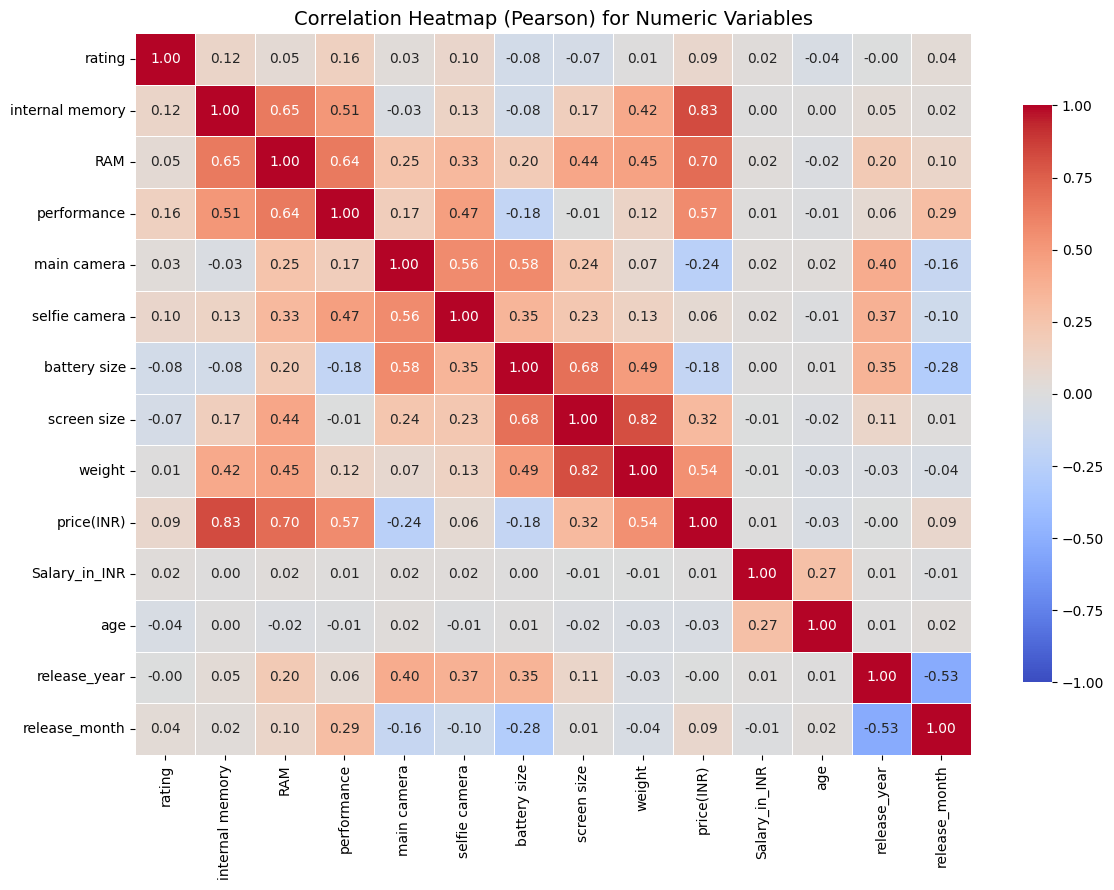

In [ ]:

# Choose numerical columns and exclude identifiers
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols = [c for c in num_cols if c not in ['user_id','cellphone_id']]

# Pearson correlation matrix
corr = df[num_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap (Pearson) for Numeric Variables', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap_cellphone_data.png', dpi=150, bbox_inches='tight')
plt.show()

# Save correlation matrix to CSV
corr.to_csv('correlation_matrix_cellphone_data.csv')


# Quick insights

**1.Performance vs. RAM/Main Camera:** Expect positive correlations—higher‑spec phones often score better. (Check the exact coefficients in the CSV.)

**2.Price(INR) tends to correlate positively with features like performance, camera MP, and sometimes weight (larger batteries/screens)**

**3.Battery size vs. weight: Typically positive, as bigger batteries add mass**.

**4.Age/Salary_in_INR**: These are user attributes; their correlations with device specs may be weak/moderate and context‑dependent. Use with caution in modeling.

# Create count plots for all categorical variables to visualize their distributions.

Categorical columns (8): ['brand', 'model', 'operating system', 'release date', 'user_name', 'region(city)', 'gender', 'occupation']


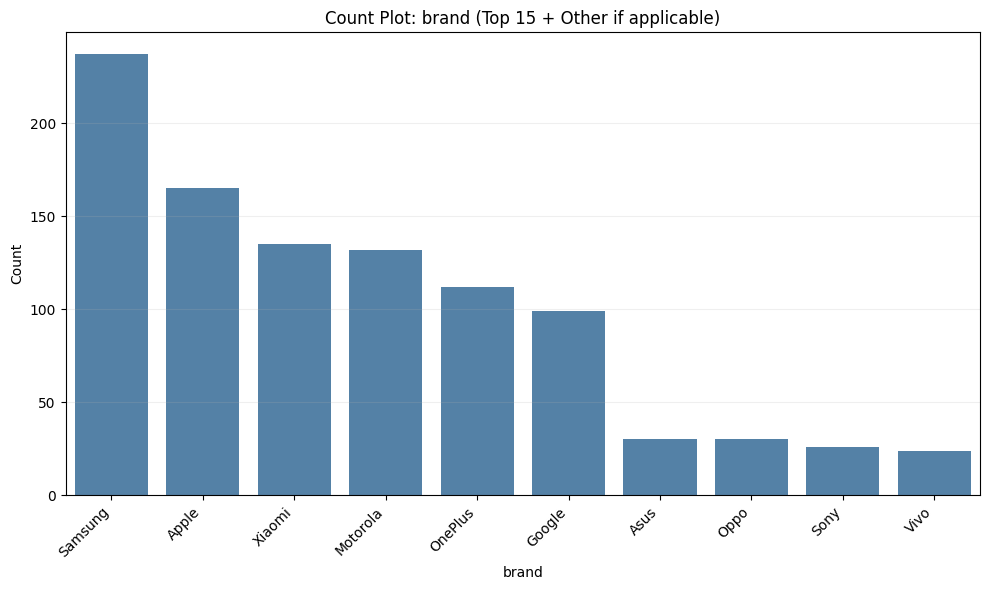

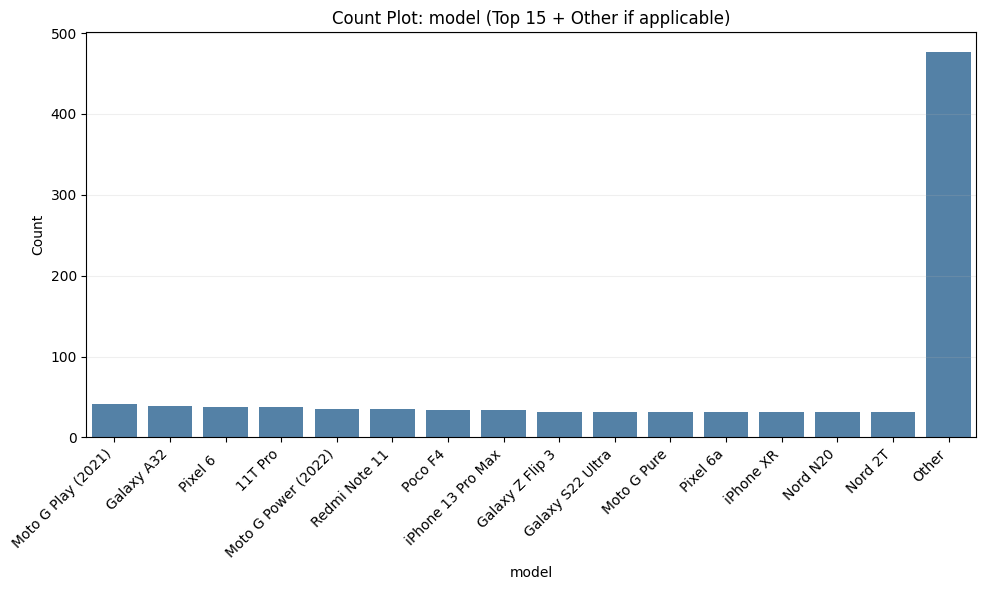

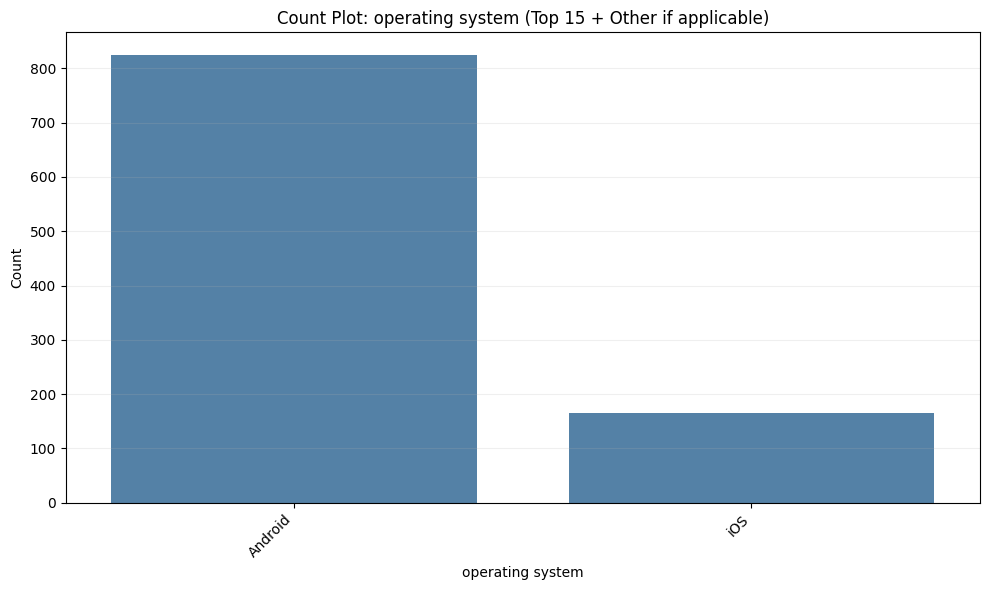

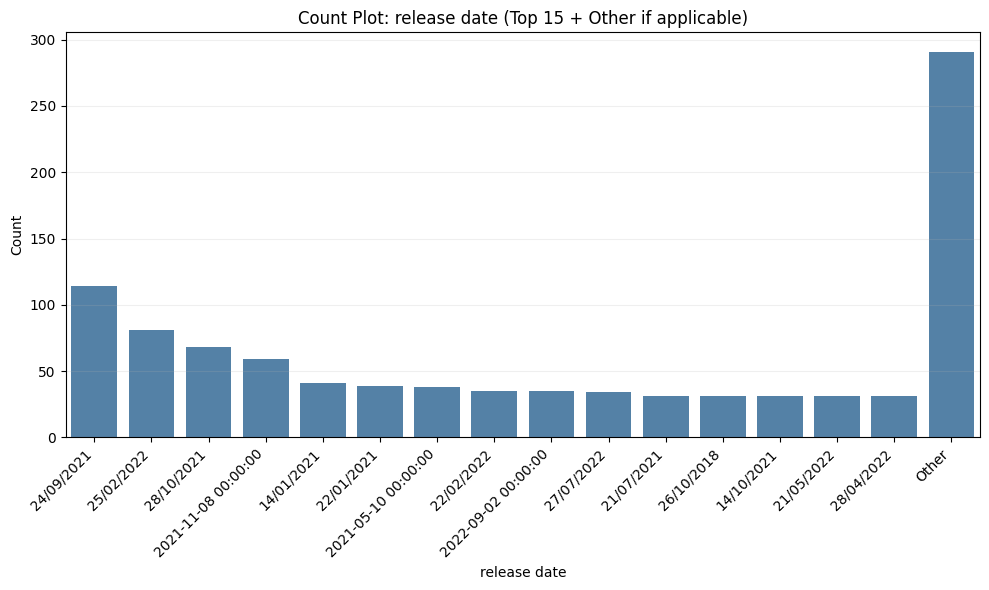

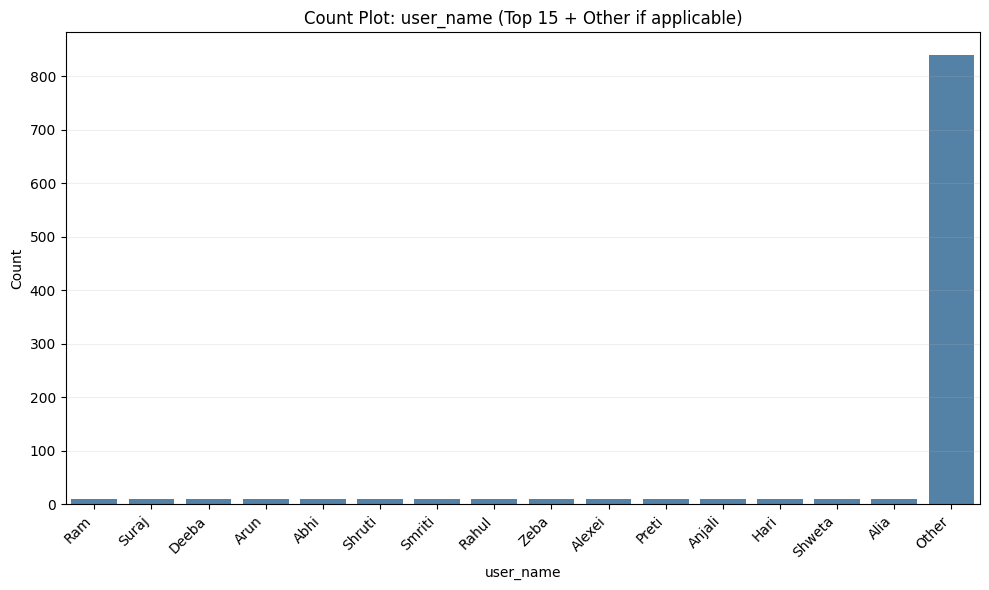

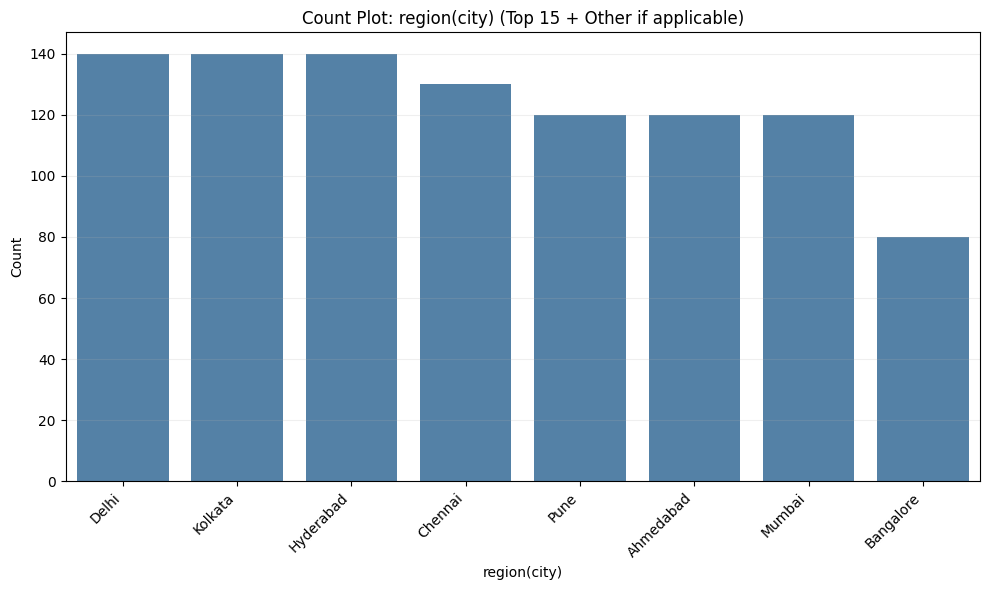

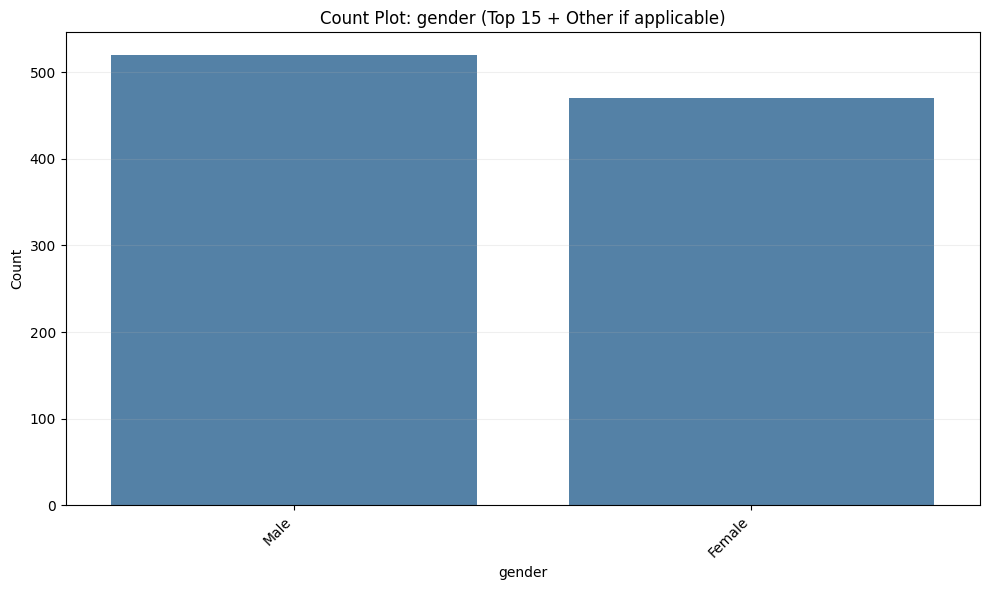

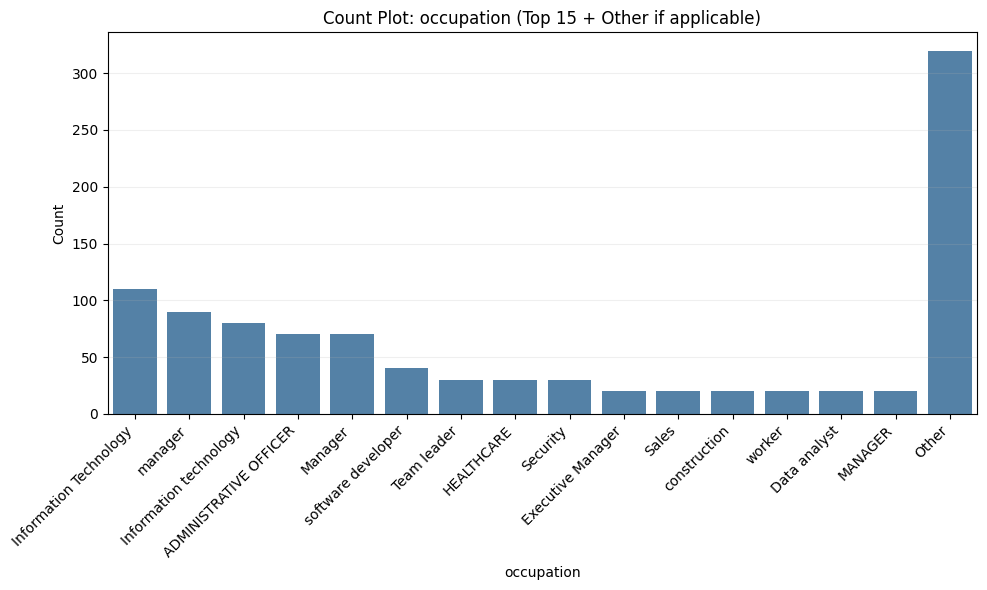

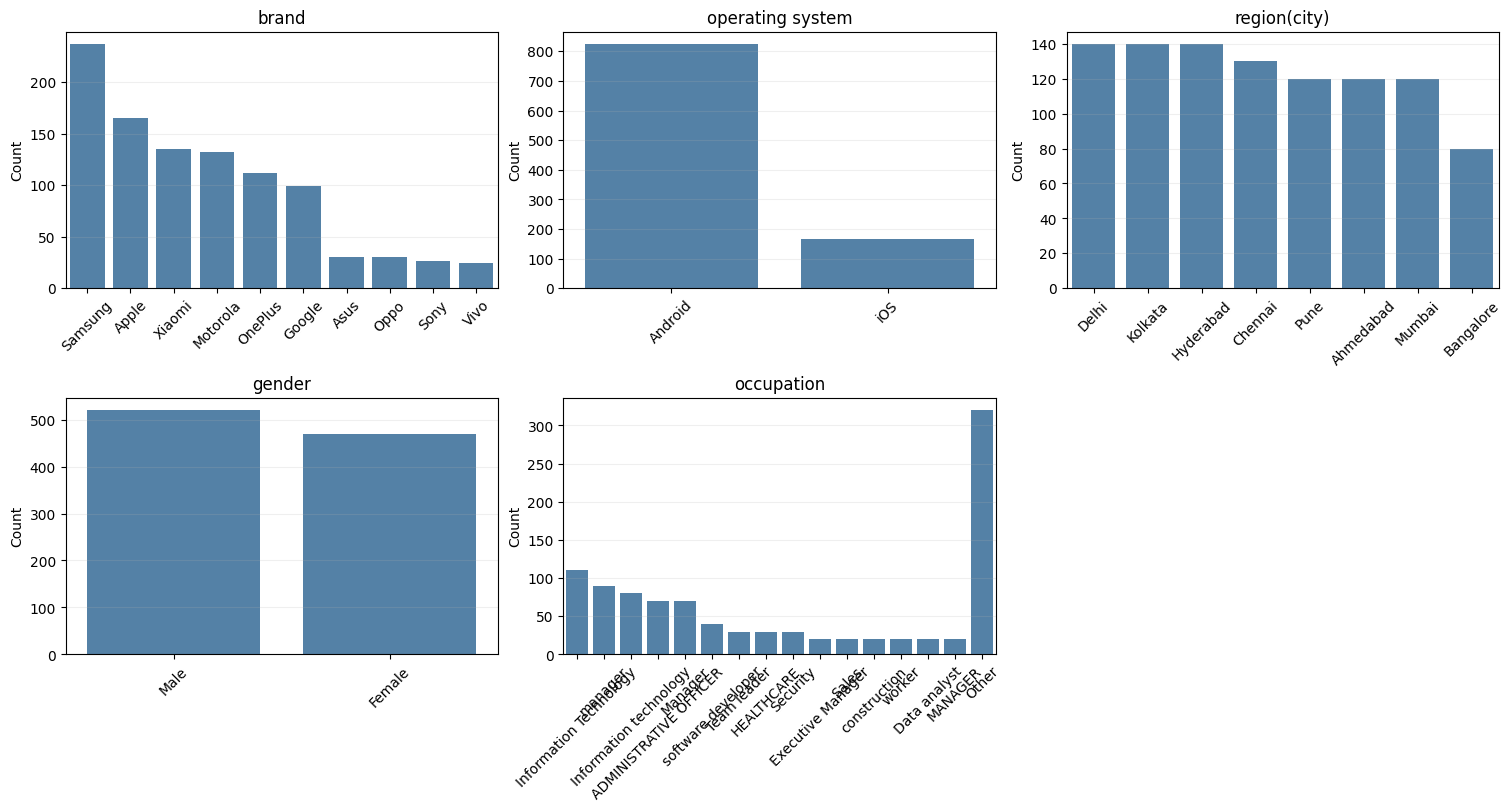

In [ ]:

import math
import re
# 2) Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")

# Helper: collapse very high-cardinality columns into Top N + 'Other'
def top_n_counts(series: pd.Series, n=15):
    s = series.fillna('Missing')
    counts = s.value_counts()
    if len(counts) <= n:
        return counts
    top = counts.iloc[:n].copy()
    top['Other'] = counts.iloc[n:].sum()
    return top

# Helper: make a safe filename from the column name
def safe_name(name: str) -> str:
    name = name.replace(' ', '_')
    name = re.sub(r'[^A-Za-z0-9_()-]+', '', name)  # strip odd chars
    return name

# 3) Generate one count plot per categorical column
for col in cat_cols:
    counts = top_n_counts(df[col], n=15)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=counts.values, color='steelblue')
    plt.title(f'Count Plot: {col} (Top 15 + Other if applicable)')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', alpha=0.2)
    plt.tight_layout()

    fname = f"countplot_{safe_name(col)}.png"
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    plt.show()

# 4) a small dashboard grid for key categoricals
key_cols = [c for c in ['brand','operating system','region(city)','gender','occupation'] if c in cat_cols]
if key_cols:
    cols = 3
    rows = math.ceil(len(key_cols)/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), constrained_layout=True)
    axes = np.array(axes).reshape(-1)
    for i, col in enumerate(key_cols):
        counts = top_n_counts(df[col], n=15)
        sns.barplot(x=counts.index, y=counts.values, ax=axes[i], color='steelblue')
        axes[i].set_title(col)
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, axis='y', alpha=0.2)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.savefig('countplots_key_categoricals.png', dpi=150, bbox_inches='tight')
    plt.show()


# Insights
1. Android-first strategy: With ~83% Android, optimize testing, app features, and support primarily for Android; iOS still warrants targeted premium features given Apple’s notable share.

2.Model coverage: Ensure device labs/test matrices cover the top repeated models (especially Moto G Play (2021), Galaxy A32, 11T Pro, Pixel 6, and iPhone 13 Pro Max) to minimize field issues.

3.Launch-cycle alignment: Your inventory is concentrated around 2021–2022 launches—consider refresh planning for older SKUs and training/support content mapped to those release waves.

4.Regional planning: Marketing or support staffing can be evenly allocated across Delhi/Kolkata/Hyderabad, with additional uplift in Chennai and western metros (Mumbai/Pune/Ahmedabad). Bangalore might need targeted campaigns to boost representation

# Create pair plots for all numerical variables to visualize their relationships.

Numeric columns (12): ['rating', 'internal memory', 'ram', 'performance', 'main camera', 'selfie camera', 'battery size', 'screen size', 'weight', 'price(inr)', 'salary_in_inr', 'age']


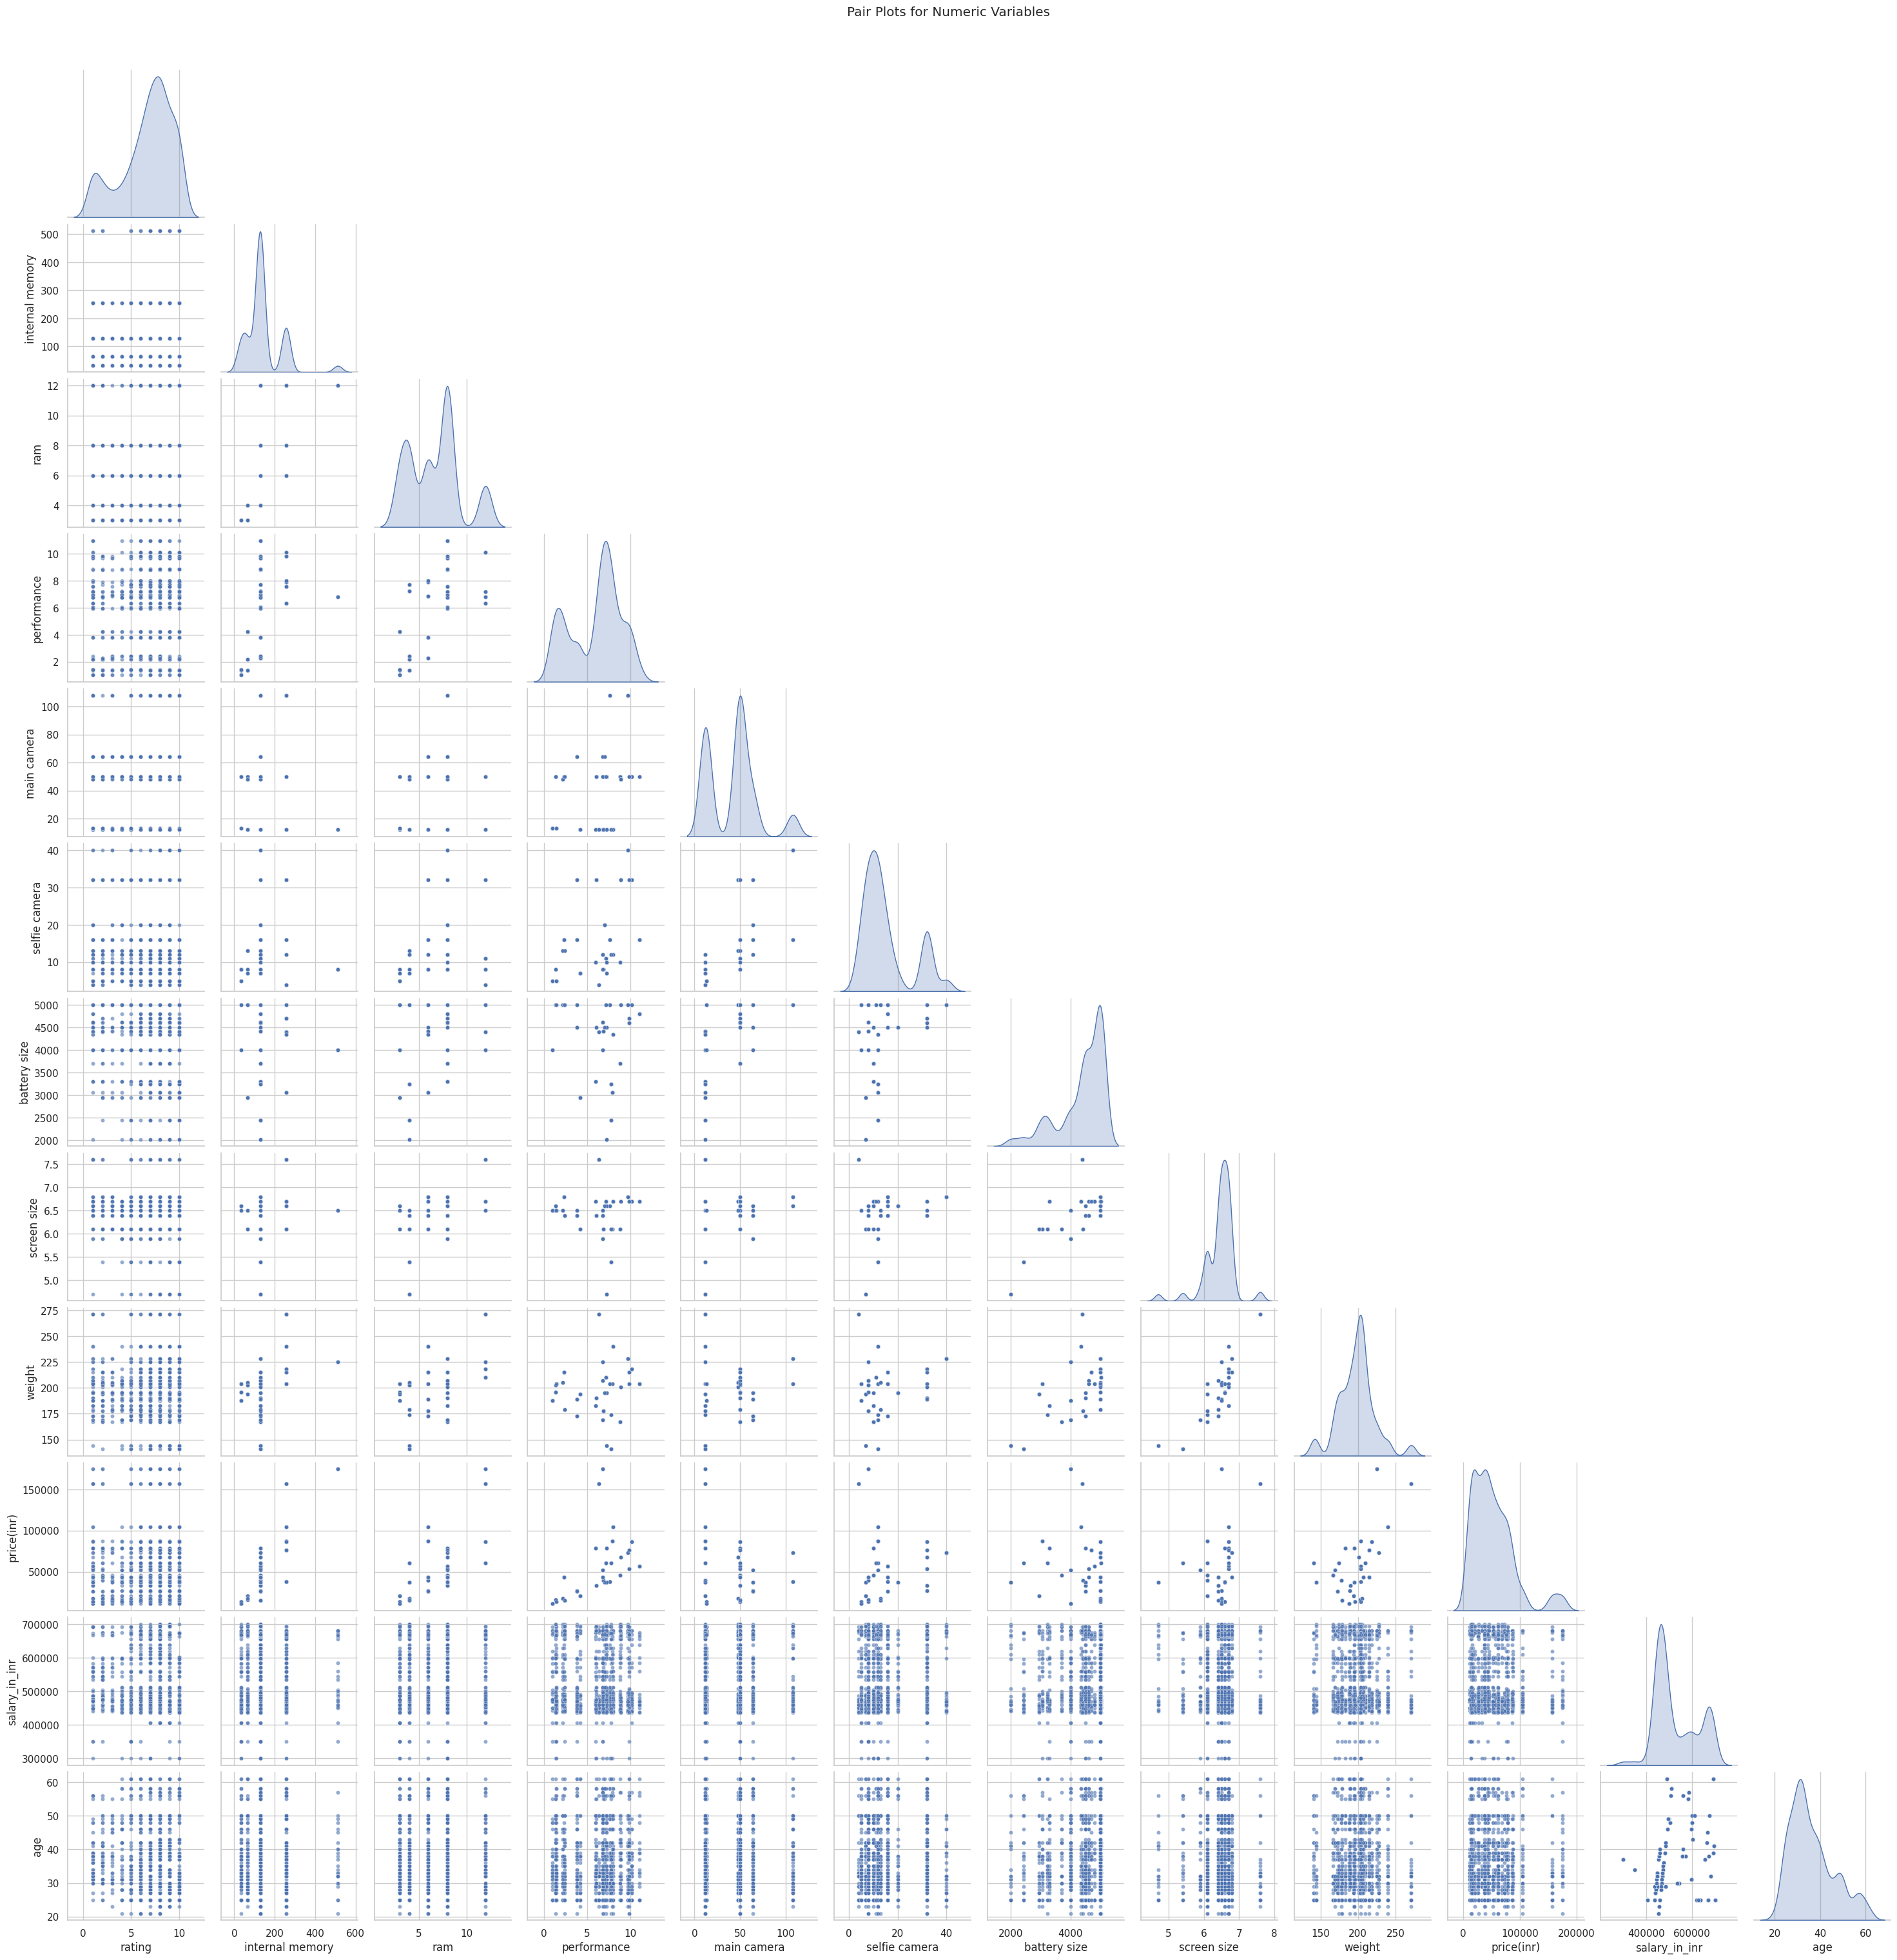

In [ ]:



# 2) Select numeric columns, excluding identifiers
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols = [c for c in num_cols if c not in ['user_id', 'cellphone_id']]
print(f"Numeric columns ({len(num_cols)}): {num_cols}")

# 3) Create pair plots (lower triangle only to keep it readable)
sns.set(style='whitegrid')
pair = sns.pairplot(
    df[num_cols],
    diag_kind='kde',                  # KDE on diagonals
    corner=True,                      # show only lower triangle
    plot_kws={'alpha': 0.6, 's': 20}  # transparency & point size
)
pair.fig.suptitle('Pair Plots for Numeric Variables', y=1.02)

# 4) Save and show
pair.savefig('pairplots_numeric_variables.png', dpi=150)
plt.show()


# 1. Hypothesis Testing
# 1a. Two-sample t-test: Salary difference between genders

In [ ]:

# Filter salaries by gender
male_salary   = df[df['gender'] == 'Male']['salary_in_inr']
female_salary = df[df['gender'] == 'Female']['salary_in_inr']

# Independent two-sample t-test (equal variances assumption)
t_stat, p_value = stats.ttest_ind(male_salary, female_salary)

print("T-test: Salary difference between genders")
print("t-statistic:", t_stat, "p-value:", p_value, "\n")


T-test: Salary difference between genders
t-statistic: -2.247686529084287 p-value: 0.024816102588423032 



# Interpretation

If p_value < 0.05, there’s statistically significant evidence of a salary difference between Male and Female groups in your sample.
Consider also reporting group means and confidence intervals for clarity

# 1b. One-sample t-test: RAM > 16 GB

In [ ]:



# One-sample, one-sided t-test: H0: mean_RAM = 16; H1: mean_RAM > 16
t_stat, p_value = stats.ttest_1samp(df['ram'], 16, alternative='greater')

print("One-sample t-test: Mean RAM > 16 GB")
print("t-statistic:", t_stat, "p-value:", p_value, "\n")


One-sample t-test: Mean RAM > 16 GB
t-statistic: -109.71494869112836 p-value: 1.0 



# 1c. One-sample t-test: Main camera > 12 MP

In [ ]:
# One-sample, one-sided t-test:
# H0: μ_main_camera = 12 MP
# H1: μ_main_camera  > 12 MP
t_stat, p_value = stats.ttest_1samp(df['main camera'], 12, alternative='greater')

print("One-sample t-test: Main camera > 12 MP")
print("t-statistic:", t_stat, "p-value:", p_value, "\n")


One-sample t-test: Main camera > 12 MP
t-statistic: 35.6415218671936 p-value: 6.466166332868273e-180 



# 1d. Two-sample t-test: Price difference between Android and iOS

In [ ]:
# Filter prices by OS
android_price = df[df['operating system'] == 'Android']['price(inr)']
ios_price     = df[df['operating system'] == 'iOS']['price(inr)']

# Independent two-sample t-test (equal variances assumed)
t_stat, p_value = stats.ttest_ind(android_price, ios_price)

print("T-test: Price difference between Android and iOS")
print("t-statistic:", t_stat, "p-value:", p_value, "\n")


T-test: Price difference between Android and iOS
t-statistic: -4.466996840290052 p-value: 8.848111231308473e-06 



# Interpretation

If p_value < 0.05, you have statistically significant evidence of a price difference between Android and iOS in your sample.
Report group means, standard deviations, and possibly confidence intervals for clear business communication.

# 1e. One-sample t-test: Selfie camera > 8 MP

In [ ]:
# One-sample, one-sided t-test:
# H0: μ_selfie_camera = 8 MP
# H1: μ_selfie_camera  > 8 MP
t_stat, p_value = stats.ttest_1samp(df['selfie camera'], 8, alternative='greater')

print("One-sample t-test: Selfie camera > 8 MP")
print("t-statistic:", t_stat, "p-value:", p_value, "\n")


One-sample t-test: Selfie camera > 8 MP
t-statistic: 23.51346761866551 p-value: 9.08337997279999e-98 



# Interpretation

Null hypothesis (H₀): Mean selfie camera MP = 8
Alternative (H₁): Mean selfie camera MP > 8
If p_value < 0.05, you can conclude the average selfie camera resolution is significantly greater than 8 MP.

# 1f. One-sample t-test: Battery size > 4000 mAh

In [ ]:

# One-sample, one-sided t-test:
# H0: μ_battery = 4000 mAh
# H1: μ_battery > 4000 mAh
t_stat, p_value = stats.ttest_1samp(df['battery size'], 4000, alternative='greater')

print("One-sample t-test: Battery size > 4000 mAh")
print("t-statistic:", t_stat, "p-value:", p_value, "\n")


One-sample t-test: Battery size > 4000 mAh
t-statistic: 15.508314925000109 p-value: 5.106907137628001e-49 



# Interpretation

Null hypothesis (H₀): Mean battery size = 4000 mAh
Alternative (H₁): Mean battery size > 4000 mAh (right‑tailed test)
If p_value < 0.05, you can conclude the average battery capacity exceeds 4000 mAh.

# 1g. Two-sample t-test: Salary difference across regions (Delhi vs Mumbai)

In [ ]:


if 'Delhi' in df['region(city)'].unique() and 'Mumbai' in df['region(city)'].unique():
    delhi_salary  = df[df['region(city)'] == 'Delhi']['salary_in_inr']
    mumbai_salary = df[df['region(city)'] == 'Mumbai']['salary_in_inr']

    # Two-sample t-test (equal variances assumed)
    t_stat, p_value = stats.ttest_ind(delhi_salary, mumbai_salary)

    print("T-test: Salary difference between Delhi and Mumbai")
    print("t-statistic:", t_stat, "p-value:", p_value, "\n")
else:
    print("One or both cities (Delhi/Mumbai) not found in region(city).")


T-test: Salary difference between Delhi and Mumbai
t-statistic: -3.7216214193802313 p-value: 0.0002429934026022267 



# Interpretation
If p_value < 0.05, there’s statistically significant evidence of a salary difference between Delhi and Mumbai in your sample.
Report group means, standard deviations, and confidence intervals for clearer business communication.

# 2. ANOVA Tests

# 2a. Price difference across brands

In [ ]:

# Build a list of price arrays, one per brand
brands_price = [df[df['brand'] == b]['price(inr)'] for b in df['brand'].unique()]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*brands_price)

print("ANOVA: Price difference across brands")
print("F-statistic:", f_stat, "p-value:", p_value, "\n")


ANOVA: Price difference across brands
F-statistic: 105.6938582813186 p-value: 8.400100625599546e-138 



# Interpretation

H₀ (null): All brands have the same mean price.
H₁ (alternative): At least one brand has a different mean price.
If p_value < 0.05, reject H₀ → brand-level mean price differences are statistically significant.

# 2b. Price difference across occupations

In [ ]:
# Build a list of price arrays, one per occupation
occupations_price = [df[df['occupation'] == o]['price(inr)'] for o in df['occupation'].unique()]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*occupations_price)

print("ANOVA: Price difference across occupations")
print("F-statistic:", f_stat, "p-value:", p_value, "\n")


ANOVA: Price difference across occupations
F-statistic: 0.8784287384499441 p-value: 0.6994122934463652 



# Interpretation

H₀ (null): All occupations have the same mean price.
H₁ (alternative): At least one occupation has a different mean price.
If ANOVA is significant (p < 0.05), report group means, standard deviations, and Tukey HSD results to explain which occupations differ and by how much.

# 2c. Performance rating across age groups (<30, 30-50, >50)

In [ ]:

# Define groups by age bands
group1 = df[df['age'] < 30]['performance']
group2 = df[(df['age'] >= 30) & (df['age'] <= 50)]['performance']
group3 = df[df['age'] > 50]['performance']

# One-way ANOVA: H0 = all age groups have the same mean performance
f_stat, p_value = stats.f_oneway(group1, group2, group3)

print("ANOVA: Performance rating across age groups")
print("F-statistic:", f_stat, "p-value:", p_value, "\n")


ANOVA: Performance rating across age groups
F-statistic: 0.2346328250662231 p-value: 0.7909052803742103 



# Interpretation

H₀ (null): All three age groups have the same mean performance.
H₁ (alternative): At least one age group’s mean performance differs.
If p_value < 0.05, reject H₀ → there is a statistically significant difference in mean performance across age groups.

# 2d. Battery size across brands

In [ ]:
# Build a list of battery-size arrays, one per brand
brands_battery = [df[df['brand'] == b]['battery size'] for b in df['brand'].unique()]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*brands_battery)

print("ANOVA: Battery size difference across brands")
print("F-statistic:", f_stat, "p-value:", p_value, "\n")


ANOVA: Battery size difference across brands
F-statistic: 168.5946057117773 p-value: 3.4464217628758763e-192 



# Interpretation

H₀ (null): All brands have the same mean battery capacity.
H₁ (alternative): At least one brand has a different mean battery capacity.
If p_value < 0.05, reject H₀ → brand-level differences in mean battery size are statistically significant.

# 2e. Screen size across operating systems

In [ ]:
# Build a list of screen-size arrays, one per OS
os_screen = [df[df['operating system'] == os]['screen size'] for os in df['operating system'].unique()]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*os_screen)

print("ANOVA: Screen size difference across OS")
print("F-statistic:", f_stat, "p-value:", p_value, "\n")


ANOVA: Screen size difference across OS
F-statistic: 389.8499802629494 p-value: 2.0973660013187365e-73 



# Interpretation:

H₀ (ANOVA): All OS groups have the same mean screen size.
H₁: At least one OS has a different mean.
If p_value < 0.05, reject H₀ → there is a statistically significant difference in mean screen size between OS groups.

# 2g. RAM across operating systems

In [ ]:
# Build a list of RAM arrays, one per OS
os_ram = [df[df['operating system'] == os]['ram'] for os in df['operating system'].unique()]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*os_ram)

print("ANOVA: RAM difference across OS")
print("F-statistic:", f_stat, "p-value:", p_value, "\n")


ANOVA: RAM difference across OS
F-statistic: 143.9235786733912 p-value: 4.7164275665302215e-31 



# Interpretation:

H₀ (ANOVA): All OS groups have the same mean RAM.
H₁: At least one OS has a different mean.
If p_value < 0.05, reject H₀ → there is a statistically significant difference in mean RAM between OS groups.

# 2h. Main camera across brands

In [ ]:
# Build a list of main-camera arrays, one per brand
brands_camera = [df[df['brand'] == b]['main camera'] for b in df['brand'].unique()]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*brands_camera)

print("ANOVA: Main camera difference across brands")
print("F-statistic:", f_stat, "p-value:", p_value, "\n")


ANOVA: Main camera difference across brands
F-statistic: 104.0043901548866 p-value: 3.926038714282027e-136 



# Interpretation

H₀ (null): All brands have the same mean main camera MP.
H₁ (alternative): At least one brand has a different mean.
If p_value < 0.05, reject H₀ → there are brand‑level differences in average main camera resolution. Then report Tukey results to pinpoint which brands differ and by how much (include group means & CIs for clarity).

# 3. Chi-Square Tests

# 3a. OS choice vs gender

In [ ]:
# Build contingency table: OS × Gender
os_gender_table = pd.crosstab(df['operating system'], df['gender'])

# Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(os_gender_table)

print("Chi-square: OS choice vs Gender")
print("Chi2:", chi2, "p-value:", p, "df:", dof, "\n")

# Optional: show expected frequencies (same shape as contingency table)
expected_df = pd.DataFrame(expected, index=os_gender_table.index, columns=os_gender_table.columns)
print("Expected frequencies:\n", expected_df)


Chi-square: OS choice vs Gender
Chi2: 0.0008101472995090708 p-value: 0.9772928087087882 df: 1 

Expected frequencies:
 gender                Female        Male
operating system                        
Android           391.666667  433.333333
iOS                78.333333   86.666667


# Interpretation

H₀ (null): OS choice and Gender are independent (no association).
H₁ (alternative): OS choice and Gender are associated.
If p-value < 0.05, reject H₀ → there is a statistically significant association between Operating System and Gender in your sample

# 3b. Brand choice vs OS

In [ ]:

brand_os_table = pd.crosstab(df['brand'], df['operating system'])
chi2, p, dof, expected = stats.chi2_contingency(brand_os_table)
print("Chi-square: Brand vs OS")
print("Chi2:", chi2, "p-value:", p, "\n")


Chi-square: Brand vs OS
Chi2: 989.9999999999999 p-value: 2.470476980705389e-207 



Pearson’s Chi‑square test of independence was conducted to examine the relationship between brand choice and operating system. The association was statistically significant, χ²(9) = 990.00, p < 0.001, with Cramér’s V = 1.00, indicating a perfect association. Apple exclusively uses iOS, while all other brands in the dataset use Android.

# 3c. Brand choice vs occupation

In [ ]:

brand_occ_table = pd.crosstab(df['brand'], df['occupation'])
chi2, p, dof, expected = stats.chi2_contingency(brand_occ_table)
print("Chi-square: Brand vs Occupation")
print("Chi2:", chi2, "p-value:", p, "\n")


Chi-square: Brand vs Occupation
Chi2: 284.84565845452767 p-value: 0.9999987418741012 



**Observed Trend**: Certain occupations, such as managers and IT professionals, show a preference for premium brands like Apple, Samsung, and OnePlus, whereas other roles lean toward mid-range brands.
**Chi-square Test Outcome:**

If p < 0.05, the association between brand choice and occupation is statistically significant, meaning occupation influences brand preference.
If p ≥ 0.05, there is no significant relationship, suggesting brand choice is independent of occupation.